##### Copyright 2025 Google LLC.

In [1]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Enum Quickstart

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Enum.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

The Gemini API allows you to supply a schema to define function arguments (for [function calling](../quickstarts/Function_calling.ipynb)), or to constrain its output in [JSON](../quickstarts/JSON_mode.ipynb) or using an Enum. This tutorial gives some examples using enums.

### Install dependencies

In [ ]:
%pip install -q -U "google-genai>=1.0.0"

### Configure your API key

To run the following cell, your API key must be stored in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see [Authentication ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](../quickstarts/Authentication.ipynb) for an example.

In [3]:
from google import genai
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
client = genai.Client(api_key=GOOGLE_API_KEY)

## Model

Now select the model you want to use in this guide, either by selecting one in the list or writing it down. Keep in mind that some models, like the 2.5 ones are thinking models and thus take slightly more time to respond (cf. [thinking notebook](./Get_started_thinking.ipynb) for more details and in particular learn how to switch the thiking off).

For more information about all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini) for extended information on each of them.


In [4]:
MODEL_ID = "gemini-3-flash-preview" # @param ["gemini-2.5-flash-lite", "gemini-2.5-flash", "gemini-2.5-pro", "gemini-2.5-flash-preview", "gemini-3-pro-preview"] {"allow-input":true, isTemplate: true}

## Enums

In the simplest case is you need the model to choose one option from a list of choices, use an enum class to define the schema. Ask it to identify this instrument:

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  111k  100  111k    0     0   287k      0 --:--:-- --:--:-- --:--:--  287k


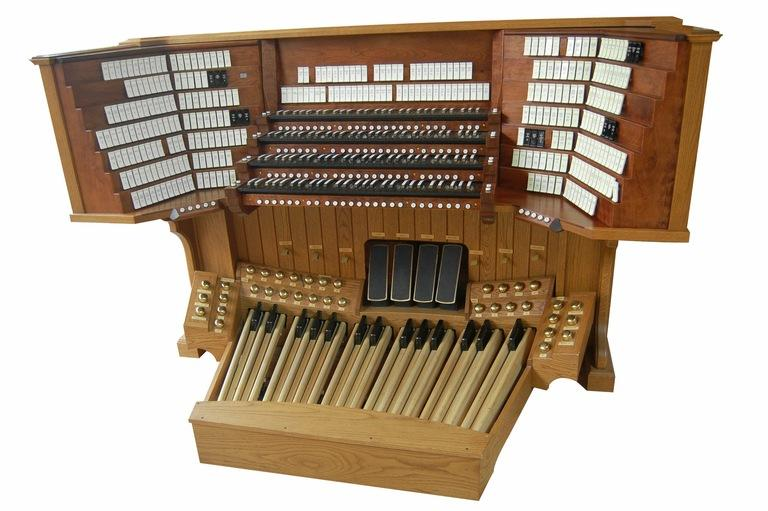

In [5]:
!curl -O https://storage.googleapis.com/generativeai-downloads/images/instrument.jpg

from PIL import Image

instrument = Image.open('instrument.jpg')
instrument

The response should be one of the following options:

In [6]:
import enum

class InstrumentClass(enum.Enum):
    PERCUSSION = "Percussion"
    STRING = "String"
    WOODWIND = "Woodwind"
    BRASS = "Brass"
    KEYBOARD = "Keyboard"

Pass the enum class as the `response_schema`, and for this simplest case you can use the `response_mime_type = "text/x.enum"` option to get one of those enum members as the response.

In [7]:
from google.genai import types

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[instrument, 'what is the category of this instrument?'],
    config=types.GenerateContentConfig(
        response_mime_type="text/x.enum",
        response_schema=InstrumentClass
    )
)

print(response.text)

Brass


You can also use enums with `response_mime_type = "application/json"`. In this simple case the response will be identical but in quotes.

In [8]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[instrument, 'what category of instrument is this?'],
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=InstrumentClass
    )
)

print(response.text)

"Keyboard"


Outside of simple multiple choice problems, an enum can be used anywhere in the schema for [JSON](../quickstarts/JSON_mode.ipynb) or [function calling](../quickstarts/Function_calling.ipynb). For example, ask it for a list of recipe titles, and use a `Grade` enum to give each one a popularity-grade:

In [9]:
import typing_extensions as typing

class Grade(enum.Enum):
  A_PLUS = 'a+'
  A = 'a'
  B = 'b'
  C = 'c'
  D = 'd'
  F = 'f'

class Recipe(typing.TypedDict):
  recipe_name: str
  grade: Grade

For this example you want a list of `Recipe` objects, so pass `list[Recipe]` to the `response_schema` field of the `generation_config`.

In [10]:
result = client.models.generate_content(
    model=MODEL_ID,
    contents="List about 10 cookie recipes, grade them based on popularity",
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=list[Recipe],
        http_options=types.HttpOptions(
            timeout=60000  # Pass timeout as a keyword argument to HttpOptions constructor
        )
    ),
)

In [11]:
import json
response = json.loads(result.text)
print(json.dumps(response, indent=4))

[
    {
        "recipe_name": "Chocolate Chip Cookies",
        "grade": "a+"
    },
    {
        "recipe_name": "Oatmeal Raisin Cookies",
        "grade": "a"
    },
    {
        "recipe_name": "Peanut Butter Cookies",
        "grade": "a"
    },
    {
        "recipe_name": "Sugar Cookies",
        "grade": "a"
    },
    {
        "recipe_name": "Snickerdoodles",
        "grade": "a"
    },
    {
        "recipe_name": "Macarons",
        "grade": "b"
    },
    {
        "recipe_name": "Shortbread Cookies",
        "grade": "b"
    },
    {
        "recipe_name": "Gingerbread Cookies",
        "grade": "b"
    },
    {
        "recipe_name": "White Chocolate Macadamia Nut Cookies",
        "grade": "a"
    },
    {
        "recipe_name": "Biscotti",
        "grade": "c"
    }
]


## Next Steps
### Useful API references:

Check the [structured ouput](https://ai.google.dev/gemini-api/docs/structured-output) documentation or the [`GenerationConfig`](https://ai.google.dev/api/generate-content#generationconfig) API reference for more details.

### Related examples

* The constrained output is used in the [Text summarization](../examples/json_capabilities/Text_Summarization.ipynb) example to provide the model a format to summarize a story (genre, characters, etc...)
* The [Object detection](../examples/Object_detection.ipynb) examples are using the JSON constrained output to uniiformize the output of the detection.

### Continue your discovery of the Gemini API

An Enum is not the only way to constrain the output of the model, you can also use an [JSON](../quickstarts/Enum.ipynb) schema. [Function calling](../quickstarts/Function_calling.ipynb) and [Code execution](../quickstarts/Code_Execution.ipynb) are other ways to enhance your model by either let him use your own functions or by letting it write and run them.